## Logistic Regression


## CONTENTS
- Logistic Regression 
- Types of logistic regression
- Logestic Function
- Model Building
- Model Evaluation- classification Metrics

1.`confusion matrix`:A confusion matrix is a table that is often used to describe the performance of a classification model on test  data for which the true values are known

2.area under Roc curve

3.report

outcome variable in logistic regression is probability(lies between 0  and 1)

formula:sigmoid function.

it uses the approach is maximum likelihood to find best fit line

0<=p<=1,threshold value is 0.65

probabilities are always positive and lies between 0-1


## Metrics:

- 1.confusion matrix:A confusion matrix is a table that is often used to describe the perofrmance of a classification model on test data for which the true values are known

`There are three main types of logistic regression:`

`binomial`: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.


`multinomial:` target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.


`ordinal:` it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

## Logistic Function

- A logistic function or logistic curve is a common `"S" shape`, with equation: where e = the natural logarithm base, x₀ = the x-value of the sigmoid's midpoint, L = the curve's maximum value, and k = the logistic growth rate or steepness of the curve.

### Model Building

In [1]:
import os 
import matplotlib.pyplot as plt
list(os.walk(r'C:\Users\naveen\Desktop\EDA_HR_DATA\New folder'))# which is used to print the files in a folder

[('C:\\Users\\naveen\\Desktop\\EDA_HR_DATA\\New folder',
  [],
  ['Advertising.csv',
   'car_data.csv',
   'Copy.xlsx',
   'COV, CORR, SLR_Class.xlsx',
   'Crude vs Indigo.xlsx',
   'Crude vs Indigo.zip',
   'Desc_Stats_raw_1.csv',
   'SATScores.csv',
   'Titanictest.csv',
   'Titanictrain.csv'])]

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv(r'C:\Users\naveen\Desktop\EDA_HR_DATA\New folder\Titanictrain.csv')
test = pd.read_csv(r'C:\Users\naveen\Desktop\EDA_HR_DATA\New folder\Titanictest.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.shape

(891, 12)

In [7]:
train.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.isnull().sum()## is used to print null values in data frame

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train['Age'].isnull()#checking null values in a variable

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [12]:
train['Embarked'].unique()#unique values in a variable

array(['S', 'C', 'Q', nan], dtype=object)

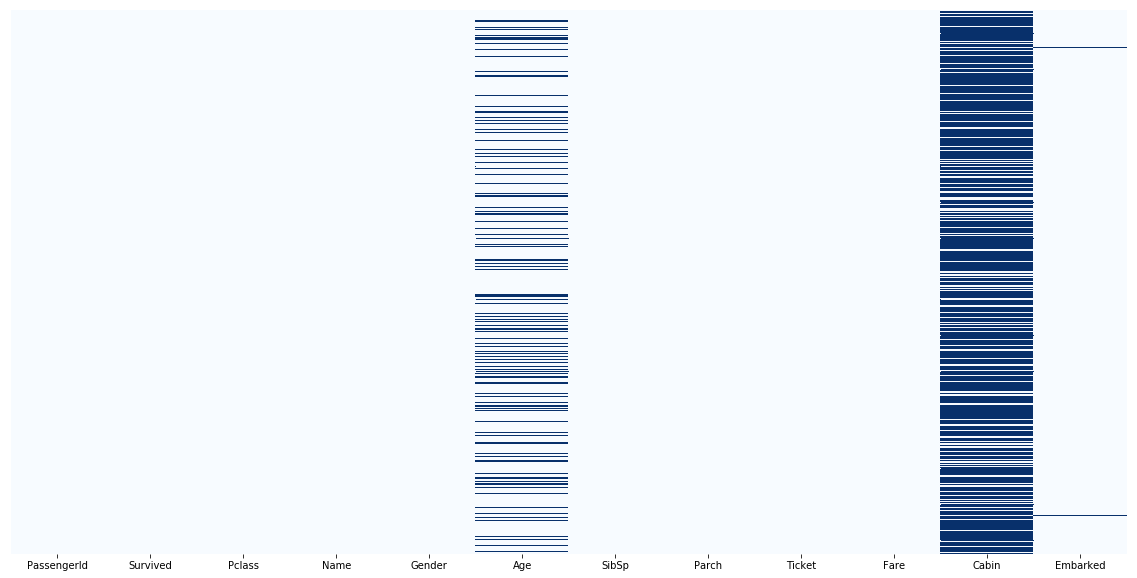

In [13]:
import seaborn as sns
#check for missing values
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Blues');
#this graph shows the null values in a data frame

In [14]:
((train['Age'].isnull().sum()/len(train)*100).round(2)).astype(str)+'%'#printing percentage of a variable null values

'19.87%'

In [15]:
((train.isnull().sum()/len(train)*100).round(2)).astype(str)+'%'

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Gender           0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

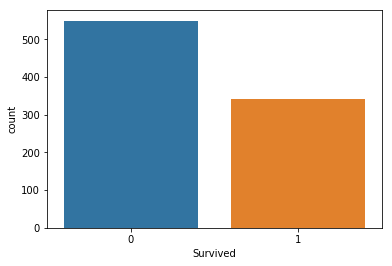

In [16]:
sns.countplot(x= 'Survived',data=train)# count plot is used for catogrical data to count 

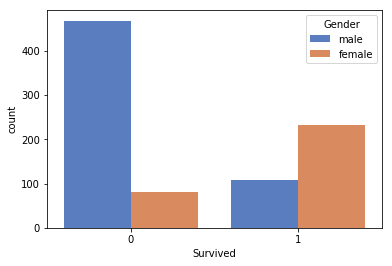

In [17]:
sns.countplot(x= 'Survived',hue='Gender',palette='muted',data=train)

In the above graph females are survived more than males(see 1)

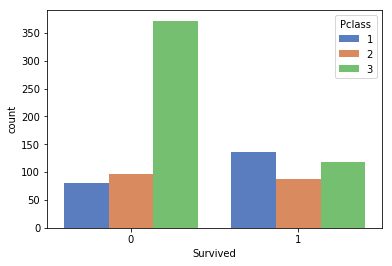

In [18]:
sns.countplot(x= 'Survived',hue='Pclass',palette='muted',data=train)#showing the survived people in pclass

In the above graph it showing in which class pepole are surivived more so 1 class people were surived more

In [19]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

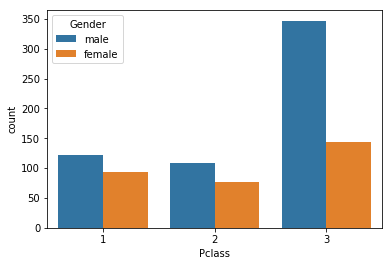

In [20]:
sns.countplot(x='Pclass',hue='Gender',data=train)

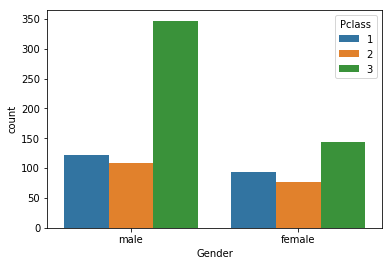

In [21]:
sns.countplot(x='Gender',hue='Pclass',data=train)

In [22]:
train['Age'].mean()

29.69911764705882

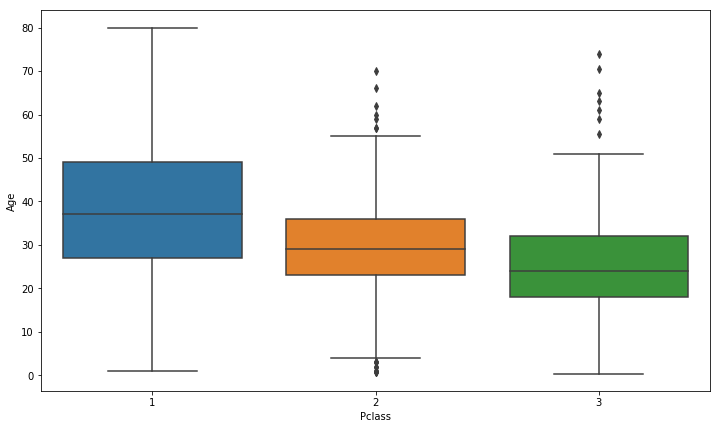

In [23]:
plt.figure(figsize=(12,7))#box plot is used to know the range of numerical column
sns.boxplot(x='Pclass',y='Age',data=train)

In [24]:
train.groupby(['Age','Gender'])[['PassengerId']].mean()

PassengerId
Age   Gender             
0.42  male     804.000000
0.67  male     756.000000
0.75  female   557.500000
0.83  male     455.500000
0.92  male     306.000000
1.00  female   277.500000
      male     470.600000
2.00  female   379.666667
      male     297.750000
3.00  female   209.500000
      male     303.250000
4.00  female   451.600000
      male     480.600000
5.00  female   380.000000
6.00  female   767.500000
      male     752.000000
7.00  female   536.000000
      male     165.000000
8.00  female   131.500000
      male     669.000000
9.00  female   544.500000
      male     330.000000
10.00 female   420.000000
      male     820.000000
11.00 female   543.000000
      male     531.666667
12.00 male     126.000000
13.00 female   614.000000
14.00 female   125.250000
      male     685.500000
...                   ...
51.00 male     404.500000
52.00 female   706.500000
      male     531.000000
53.00 female   572.000000
54.00 female   595.333333
      male     256.600000
55.00 female    16.000000
      male     493.000000
55.50 male     153.000000
56.00 female   880.000000
      male     430.333333
57.00 female   773.000000
      male     627.000000
58.00 female   159.000000
      male     574.000000
59.00 male     164.000000
60.00 female   367.000000
      male     656.000000
61.00 male     374.666667
62.00 female   830.000000
      male     460.000000
63.00 female   380.000000
64.00 male     492.500000
65.00 male     264.333333
66.00 male      34.000000
70.00 male     709.500000
70.50 male     117.000000
71.00 male     295.500000
74.00 male     852.000000
80.00 male     631.000000

[145 rows x 1 columns]

In [25]:
train.groupby(['Pclass'])[['PassengerId']].count()

,PassengerId
Pclass,
1,216
2,184
3,491


In [26]:
train.groupby(['Pclass'])[['Age']].mean().round()

,Age
Pclass,
1,38.0
2,30.0
3,25.0


In [27]:
train.groupby(['Gender'])[['Age']].mean().round()

,Age
Gender,
female,28.0
male,31.0


In [28]:
train.groupby(['SibSp'])[['Age']].mean()

,Age
SibSp,
0,31.397558
1,30.089727
2,22.620000
3,13.916667
4,7.055556
5,10.200000
8,NaN


In [29]:
train.groupby(['SibSp'])[['PassengerId']].count()

,PassengerId
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [30]:
train.groupby(['Parch'])[['Age']].mean()#family means people travelling together

,Age
Parch,
0,32.178503
1,24.422000
2,17.216912
3,33.200000
4,44.500000
5,39.200000
6,43.000000


In [31]:
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))#groupby(catogorical column,numerical column)

In [32]:
train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
5      25.14062
6      54.00000
7       2.00000
8      27.00000
9      14.00000
10      4.00000
11     58.00000
12     20.00000
13     39.00000
14     14.00000
15     55.00000
16      2.00000
17     29.87763
18     31.00000
19     25.14062
20     35.00000
21     34.00000
22     15.00000
23     28.00000
24      8.00000
25     38.00000
26     25.14062
27     19.00000
28     25.14062
29     25.14062
         ...   
861    21.00000
862    48.00000
863    25.14062
864    24.00000
865    42.00000
866    27.00000
867    31.00000
868    25.14062
869     4.00000
870    26.00000
871    47.00000
872    33.00000
873    47.00000
874    28.00000
875    15.00000
876    20.00000
877    19.00000
878    25.14062
879    56.00000
880    25.00000
881    33.00000
882    22.00000
883    28.00000
884    25.00000
885    39.00000
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, 

In [33]:
train['Age'].isnull().sum()

0

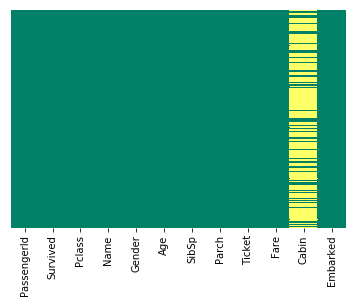

In [34]:
train.isna().sum();
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [35]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035256,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050504,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403858,0.083081,0.018443,-0.549500
Age,0.035256,-0.050504,-0.403858,1.000000,-0.243452,-0.175799,0.120886
SibSp,-0.057527,-0.035322,0.083081,-0.243452,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175799,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.120886,0.159651,0.216225,1.000000


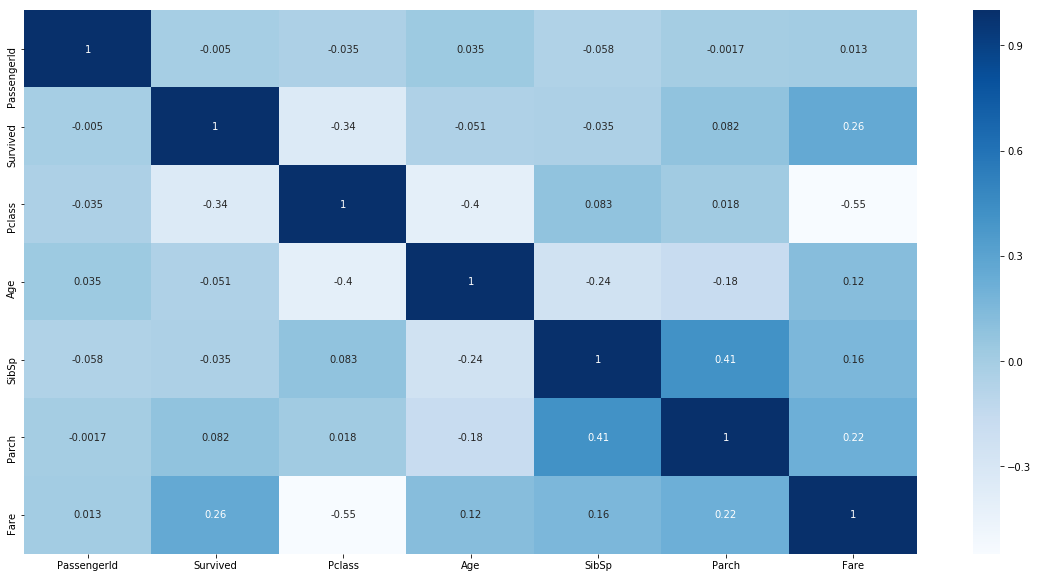

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot = True,cmap = 'Blues')#annot function is used to print % values of correlation vallues

In [37]:
train.drop(['Cabin','Embarked'],axis=1,inplace = True)#droping unnecessary variables

In [38]:
train

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708


In [39]:
train.drop(['Name','Ticket'],axis=1,inplace=True)#droping catogorical variables

In [40]:
train

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,male,22.00000,1,0,7.2500
1,2,1,1,female,38.00000,1,0,71.2833
2,3,1,3,female,26.00000,0,0,7.9250
3,4,1,1,female,35.00000,1,0,53.1000
4,5,0,3,male,35.00000,0,0,8.0500
5,6,0,3,male,25.14062,0,0,8.4583
6,7,0,1,male,54.00000,0,0,51.8625
7,8,0,3,male,2.00000,3,1,21.0750
8,9,1,3,female,27.00000,0,2,11.1333
9,10,1,2,female,14.00000,1,0,30.0708


## One hot Encoding

Converting Catogorical data into numerical data.
- One hot encoding is a process by which categorical variables are converted into a form(numerical) that could be provided to ML algorithms to do a better job in prediction.

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [41]:
pd.get_dummies(train['Gender']).head(10)
#pd.get_dummies(train['Gender']),drop_first=True).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [42]:
pd.get_dummies(train['Gender'],drop_first=True).head(10)#droping frist column from  above because male is 1 and female is 0 in each column so keeping two columns in data frame is not necessary

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [43]:
Gender = pd.get_dummies(train['Gender'],prefix = 'Gender',drop_first=True)#prefix is used to add column name at the end

In [44]:
train = pd.concat([train,Gender],axis=1)# adding column to dataframe
train.head(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Gender_male
0,1,0,3,male,22.00000,1,0,7.2500,1
1,2,1,1,female,38.00000,1,0,71.2833,0
2,3,1,3,female,26.00000,0,0,7.9250,0
3,4,1,1,female,35.00000,1,0,53.1000,0
4,5,0,3,male,35.00000,0,0,8.0500,1
5,6,0,3,male,25.14062,0,0,8.4583,1
6,7,0,1,male,54.00000,0,0,51.8625,1
7,8,0,3,male,2.00000,3,1,21.0750,1
8,9,1,3,female,27.00000,0,2,11.1333,0
9,10,1,2,female,14.00000,1,0,30.0708,0


In [45]:
train.drop(['Gender'],axis=1)#droping the catogorical data column for which one hot encoding values alredy created

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male
0,1,0,3,22.00000,1,0,7.2500,1
1,2,1,1,38.00000,1,0,71.2833,0
2,3,1,3,26.00000,0,0,7.9250,0
3,4,1,1,35.00000,1,0,53.1000,0
4,5,0,3,35.00000,0,0,8.0500,1
5,6,0,3,25.14062,0,0,8.4583,1
6,7,0,1,54.00000,0,0,51.8625,1
7,8,0,3,2.00000,3,1,21.0750,1
8,9,1,3,27.00000,0,2,11.1333,0
9,10,1,2,14.00000,1,0,30.0708,0


In [46]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Fare', 'Gender_male'],
      dtype='object')

In [47]:
## Spliting data set into test and train

features=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch','Fare','Gender_male']
X = train[features]
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [48]:
X_train.shape

(623, 7)

In [49]:
y_test.shape

(268,)

In [50]:
# fiting the dataset to model 
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#logmodel.fit(X_test,y_test)

C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
Y_predicted = logmodel.predict(X_train)

len(Y_predicted)


623

In [52]:
Y_predicted1 = logmodel.predict(X_test)
len(Y_predicted1)

268

In [53]:
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

In [54]:
predictions_train 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [55]:
predictions_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [56]:
print(logmodel.predict_proba(X_train)[:,1])

[0.92957559 0.11258171 0.82270746 0.57315992 0.75025372 0.89598267
 0.1363934  0.91766122 0.59104805 0.21417125 0.13794195 0.95336342
 0.1491094  0.68785982 0.11978911 0.05652398 0.09875736 0.29362089
 0.15007425 0.95913644 0.05600053 0.10324625 0.42206161 0.14542207
 0.14908503 0.72269412 0.06758216 0.09187625 0.46912232 0.11967172
 0.7393815  0.49159566 0.08075497 0.08737894 0.39073875 0.06078916
 0.10729507 0.11193224 0.11589951 0.91838012 0.6679556  0.08883955
 0.06831277 0.92981678 0.10312119 0.58028553 0.73633466 0.92014302
 0.09253682 0.41823565 0.87967847 0.32034436 0.2331277  0.83596506
 0.77817474 0.11432992 0.10198263 0.11427949 0.27257712 0.27739626
 0.44289057 0.84170579 0.29482137 0.19053962 0.60166093 0.7932146
 0.16035093 0.08040813 0.46503968 0.1978101  0.11542484 0.58843105
 0.64882397 0.10302914 0.31398858 0.72272366 0.09157615 0.59815369
 0.12937595 0.12836576 0.11840782 0.12131268 0.2939244  0.05081122
 0.6954795  0.15707109 0.0765459  0.29888521 0.50128412 0.27663

In [57]:
import numpy as np
# to Change the prediction threshold
np.where(logmodel.predict_proba(X_train)[:,1] > 0.5,1,0)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [58]:
# to Change the prediction threshold
np.where(logmodel.predict_proba(X_test)[:,1] > 0.5,1,0)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

###  Evaluation metrics

In [59]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

print(classification_report(y_train,predictions_train))
print('Accuracy:',accuracy_score(y_train,predictions_train))

print(classification_report(y_test,predictions_test))
print('Accuracy:',accuracy_score(y_test,predictions_test))



              precision    recall  f1-score   support

           0       0.84      0.89      0.86       395
           1       0.78      0.70      0.74       228

   micro avg       0.82      0.82      0.82       623
   macro avg       0.81      0.79      0.80       623
weighted avg       0.82      0.82      0.82       623

Accuracy: 0.8186195826645265
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

Accuracy: 0.7798507462686567


In [60]:
#confusion matrix metric
cnf_matrix=confusion_matrix(y_true=y_train,y_pred=predictions_train)

cm = pd.DataFrame(cnf_matrix)
cm

,0,1
0,350,45
1,68,160


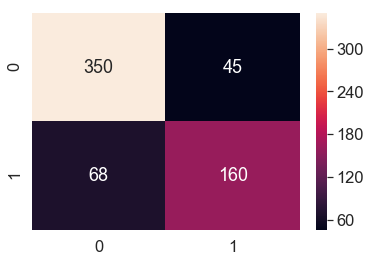

In [61]:
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, fmt='g');

In [62]:
y_train.shape

(623,)

In [63]:
X_test.shape

(268, 7)

In [64]:
X_train.shape

(623, 7)

In [65]:
#confusion matrix metric
cnf_matrix1=confusion_matrix(y_true=y_test,y_pred=predictions_test)

cm2 = pd.DataFrame(cnf_matrix1)
cm2

,0,1
0,135,19
1,40,74


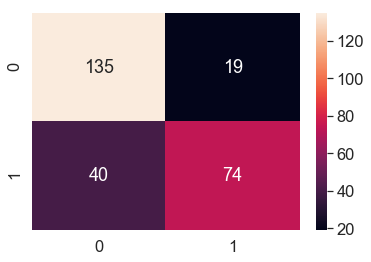

In [66]:
sns.set(font_scale=1.5)
sns.heatmap(cm2,annot=True, fmt='g');

In [67]:
# Determine the false positive and true positive rates
FPR ,TPR,_=roc_curve(y_train,predictions_train)
FPR1, TPR1,_1 = roc_curve(y_test,predictions_test)

In [68]:
#calculate the AUC
roc_auc =auc(FPR,TPR)
print('ROC AUC: %0.3f' % roc_auc)

roc_auc1 = auc(FPR1,TPR1)
print('ROC AUC:%0.3f'%roc_auc1)

ROC AUC: 0.794
ROC AUC:0.763


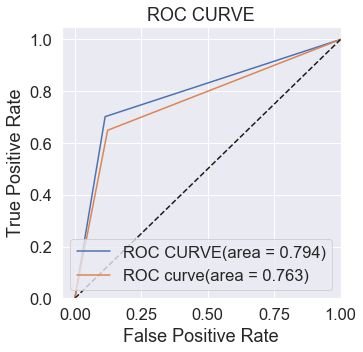

In [69]:
# plot of a ROC Curve
plt.figure(figsize=(5,5))
plt.plot(FPR ,TPR,label = "ROC CURVE(area = %0.3f)" % roc_auc)
plt.plot(FPR1,TPR1,label='ROC curve(area = %0.3f)' % roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show();

## Stats model

In [70]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470417
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:                  0.2837
Time:                        21:22:03   Log-Likelihood:                -293.07
converged:                       True   LL-Null:                       -409.17
                                        LLR p-value:                 2.592e-47
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0010      0.000      2.511      0.012       0.000       0.002
Pclass         -0.0094    

## remove Parch,age,pclass and repeat the same tasks like above for the better result

In [71]:
## Spliting data set into test and train

features_finetune=['PassengerId','SibSp','Fare','Gender_male']
X1 = train[features]
y1 = train['Survived']
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.30,random_state=101)

In [72]:
# fiting the dataset to model 
from sklearn.linear_model import LogisticRegression

logmodel1 = LogisticRegression()
logmodel1.fit(X1_train,y1_train)


C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
predictions_train1 = logmodel.predict(X1_train)
predictions_test1 = logmodel.predict(X1_test)

In [74]:
# to Change the prediction threshold
np.where(logmodel1.predict_proba(X1_test)[:,1] > 0.5,1,0)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [75]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

print(classification_report(y1_train,predictions_train1))
print('Accuracy:',accuracy_score(y1_train,predictions_train1))

print(classification_report(y1_test,predictions_test1))
print('Accuracy:',accuracy_score(y1_test,predictions_test1))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       395
           1       0.78      0.70      0.74       228

   micro avg       0.82      0.82      0.82       623
   macro avg       0.81      0.79      0.80       623
weighted avg       0.82      0.82      0.82       623

Accuracy: 0.8186195826645265
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

Accuracy: 0.7798507462686567


In [76]:
#confusion matrix metric
cnf_matrix1=confusion_matrix(y_true=y1_train,y_pred=predictions_train1)

cm1 = pd.DataFrame(cnf_matrix1)
cm1

,0,1
0,350,45
1,68,160


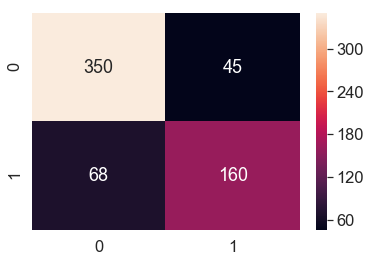

In [77]:
sns.set(font_scale=1.5)
sns.heatmap(cm1,annot=True, fmt='g');# fmt ='g' is used to accept more than 2 numbers

In [78]:
#confusion matrix metric
cnf_matrix3=confusion_matrix(y_true=y1_test,y_pred=predictions_test1)

cm3 = pd.DataFrame(cnf_matrix3)
cm3

,0,1
0,135,19
1,40,74


In [79]:
# Determine the false positive and true positive rates
FPR2 ,TPR2,_=roc_curve(y1_train,predictions_train1)
FPR3, TPR3,_ = roc_curve(y1_test,predictions_test1)

In [80]:
#calculate the AUC
roc_auc =auc(FPR2,TPR2)
print('ROC AUC: %0.3f' % roc_auc)

roc_auc1 = auc(FPR3,TPR3)
print('ROC AUC:%0.3f'%roc_auc1)

ROC AUC: 0.794
ROC AUC:0.763


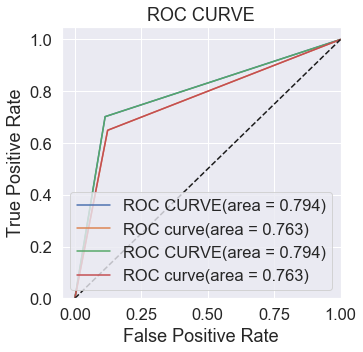

In [81]:
# plot of a ROC Curve
plt.figure(figsize=(5,5))
plt.plot(FPR ,TPR,label = "ROC CURVE(area = %0.3f)" % roc_auc)
plt.plot(FPR1,TPR1,label='ROC curve(area = %0.3f)' % roc_auc1)
plt.plot(FPR2 ,TPR2,label = "ROC CURVE(area = %0.3f)" % roc_auc)
plt.plot(FPR3,TPR3,label='ROC curve(area = %0.3f)' % roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show();

In [82]:
import statsmodels.api as sm
logit_model1 = sm.Logit(y1_train,X1_train)
result=logit_model1.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470417
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:                  0.2837
Time:                        21:22:06   Log-Likelihood:                -293.07
converged:                       True   LL-Null:                       -409.17
                                        LLR p-value:                 2.592e-47
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0010      0.000      2.511      0.012       0.000       0.002
Pclass         -0.0094    

In [89]:
test1 = pd.read_csv(r'C:\Users\naveen\Desktop\EDA_HR_DATA\New folder\Titanictest.csv')

In [90]:
test1.drop(['Embarked','Cabin','Name','Ticket'],axis = 1,inplace=True)

In [91]:
pd.get_dummies(test1['Gender'])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [92]:
pd.get_dummies(test1['Gender'],drop_first=True)

,male
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,1
8,0
9,1


In [97]:
test1 = pd.concat([test1,Gender],axis = 1)

In [98]:
test1.drop(['Gender'],axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender_male
0,892.0,3.0,34.5,0.0,0.0,7.8292,1
1,893.0,3.0,47.0,1.0,0.0,7.0000,0
2,894.0,2.0,62.0,0.0,0.0,9.6875,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0
4,896.0,3.0,22.0,1.0,1.0,12.2875,1
5,897.0,3.0,14.0,0.0,0.0,9.2250,1
6,898.0,3.0,30.0,0.0,0.0,7.6292,1
7,899.0,2.0,26.0,1.0,1.0,29.0000,1
8,900.0,3.0,18.0,0.0,0.0,7.2292,0
9,901.0,3.0,21.0,2.0,0.0,24.1500,0


In [99]:
features=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch','Fare','Gender_male']
X = test1[features]
y = test['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

KeyError: 'Survived'